#### Facebook Prophet Tutorial 
![](facebookprophet.png)

#### Installing
+ pip install pystan
+ pip install fbprophet
+ conda install -c conda-forge fbprophet

### Intro To Facebook Prophet
+ Steps
    - Initialize Model :: Prophet()
    - Set columns as ds,y
    - Fit dataset :: Prophet().fit()
    - Create Dates To predict :: Prophet().make_future_dataframe(periods=365)
    - Predict :: Prophet().predict(future_dates)  
    - Plot :: Prophet().plot(predictions)

In [55]:
# Load EDA Pkgs
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [56]:
# Load FB Prophet
import fbprophet

In [57]:
dir(fbprophet)

['Prophet',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'diagnostics',
 'forecaster',
 'hdays',
 'make_holidays',
 'models',
 'plot']

In [58]:
# Load our Dataset
df = pd.read_csv("flights_data.csv")

In [59]:
df.head()

,Dates,no_of_flights
0,2005-01-01,594924
1,2005-02-01,545332
2,2005-03-01,617540
3,2005-04-01,594492
4,2005-05-01,614802


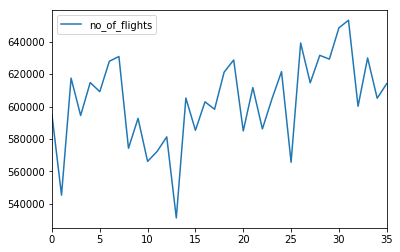

In [60]:
df.plot()

In [62]:
#yt = yt -y(t-1)
df['no_of_flights'] = df['no_of_flights'] - df['no_of_flights'].shift(1)

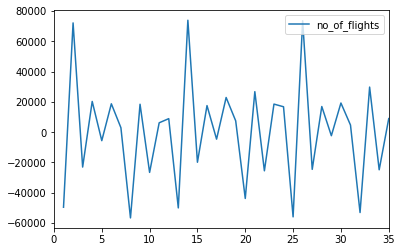

In [63]:
df.plot()

In [64]:
from fbprophet import Prophet

In [65]:
# Features of Prophet
dir(Prophet)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'add_country_holidays',
 'add_group_component',
 'add_regressor',
 'add_seasonality',
 'construct_holiday_dataframe',
 'fit',
 'fourier_series',
 'initialize_scales',
 'linear_growth_init',
 'logistic_growth_init',
 'make_all_seasonality_features',
 'make_future_dataframe',
 'make_holiday_features',
 'make_seasonality_features',
 'parse_seasonality_args',
 'piecewise_linear',
 'piecewise_logistic',
 'plot',
 'plot_components',
 'predict',
 'predict_seasonal_components',
 'predict_trend',
 'predict_uncertainty',
 'predictive_samples',
 'regressor_column_matrix',
 'sample_model',
 'sample_posterior_predictive',
 'sample_pre

In [66]:
# Initialize the Model
model = Prophet()

#### Parameters
+ growth: linear/logistic
+ seasonality:additive/multiplicative
+ holidays:
+ changepoint:

In [67]:
df.columns

Index(['Dates', 'no_of_flights'], dtype='object')

In [68]:
# Works with a ds and y column names
df.rename(columns={'Dates':'ds','no_of_flights':'y'},inplace=True)

In [69]:
df.head()

,ds,y
0,2005-01-01,NaN
1,2005-02-01,-49592.0
2,2005-03-01,72208.0
3,2005-04-01,-23048.0
4,2005-05-01,20310.0


In [70]:
df = df[1:]

In [71]:
df.head()

,ds,y
1,2005-02-01,-49592.0
2,2005-03-01,72208.0
3,2005-04-01,-23048.0
4,2005-05-01,20310.0
5,2005-06-01,-5607.0


In [72]:
# Fit our Model to our Data
model.fit(df)

/usr/local/lib/python3.6/dist-packages/fbprophet/forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [73]:
# Shape of Dataset
df.shape

(35, 2)

In [74]:
# Create Future Dates of 365 days
future_dates = model.make_future_dataframe(periods=365)

In [75]:
# Shape after adding 365 days
future_dates.shape

(400, 1)

In [76]:
future_dates.head()

,ds
0,2005-02-01
1,2005-03-01
2,2005-04-01
3,2005-05-01
4,2005-06-01


In [77]:
# Make Prediction with our Model
prediction = model.predict(future_dates)

In [78]:
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2005-02-01,-1165.542097,-56137.569128,-48840.518562,-1165.542097,-1165.542097,-51229.325339,-51229.325339,-51229.325339,-51229.325339,-51229.325339,-51229.325339,0.0,0.0,0.0,-52394.867436
1,2005-03-01,-1064.155913,68024.947887,75266.690673,-1064.155913,-1064.155913,72711.688639,72711.688639,72711.688639,72711.688639,72711.688639,72711.688639,0.0,0.0,0.0,71647.532726
2,2005-04-01,-951.906923,-27091.175977,-19899.206467,-951.906923,-951.906923,-22409.048094,-22409.048094,-22409.048094,-22409.048094,-22409.048094,-22409.048094,0.0,0.0,0.0,-23360.955017
3,2005-05-01,-843.278873,13581.351020,20774.735962,-843.278873,-843.278873,18062.172577,18062.172577,18062.172577,18062.172577,18062.172577,18062.172577,0.0,0.0,0.0,17218.893703
4,2005-06-01,-731.029888,-9191.182715,-2021.777104,-731.029888,-731.029888,-4783.426593,-4783.426593,-4783.426593,-4783.426593,-4783.426593,-4783.426593,0.0,0.0,0.0,-5514.456481


#### Narrative
+ yhat : the predicted forecast
+ yhat_lower : the lower border of the prediction
+ yhat_upper: the upper border of the prediction

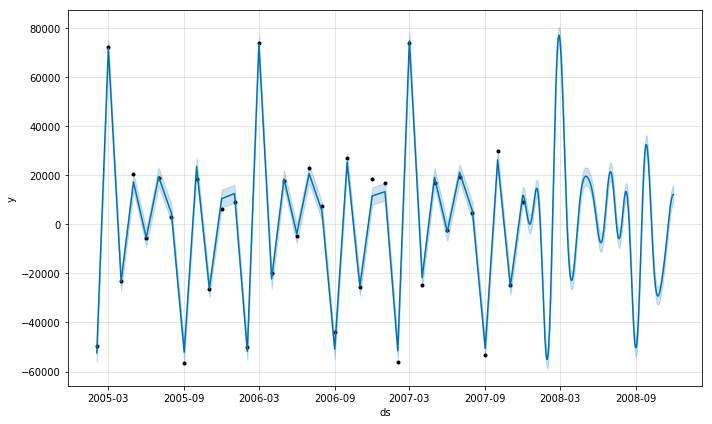

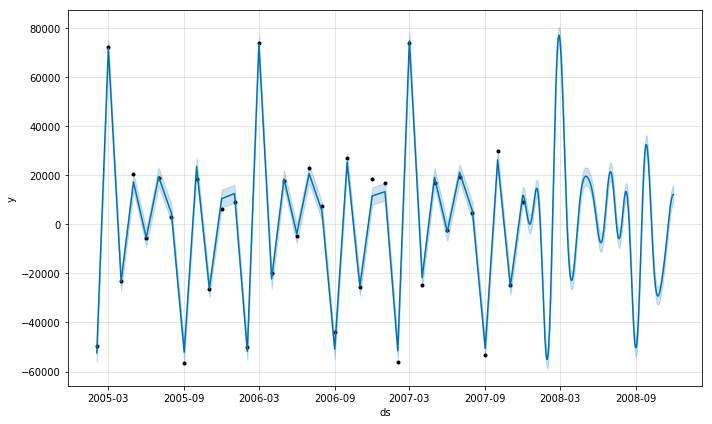

In [79]:
# Plot Our Predictions
model.plot(prediction)

#### Narrative
+ A Trending data
+ Black dots : the actual data points in our dataset.
+ Deep blue line : the predicted forecast/the predicted values
+ Light blue line : the boundaries

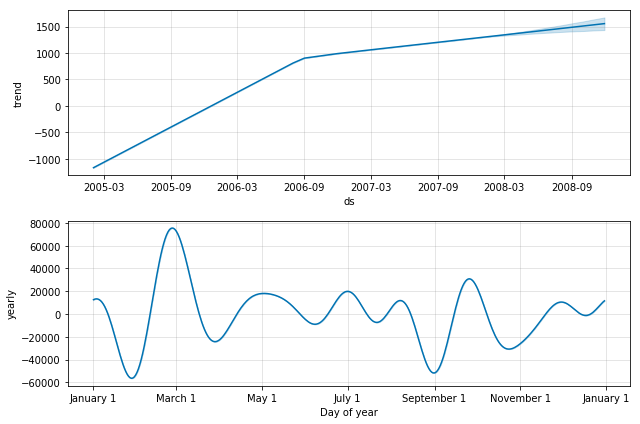

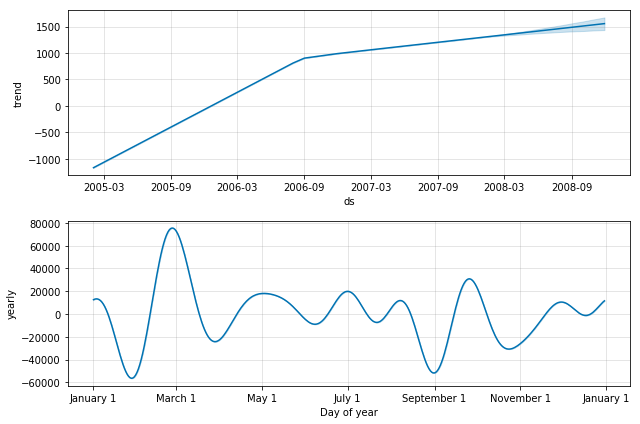

In [80]:
# Visualize Each Component [Trends,Weekly]
model.plot_components(prediction)

### Cross Validation
+ For measuring forecast error by comparing the predicted values with the actual values
+ initial:the size of the initial training period
+ period : the spacing between cutoff dates
+ horizon : the forecast horizon((ds minus cutoff)
+  By default, the initial training period is set to three times the horizon, and cutoffs are made every half a horizon

In [81]:
# Load Pkgs
from fbprophet.diagnostics import cross_validation

In [82]:
df.shape

(35, 2)

In [85]:
cv = cross_validation(model,initial='35 days', period='180 days', horizon = '365 days')

INFO:fbprophet:Making 4 forecasts with cutoffs between 2005-06-09 00:00:00 and 2006-12-01 00:00:00
/usr/local/lib/python3.6/dist-packages/fbprophet/forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
INFO:fbprophet:n_changepoints greater than number of observations.Using 3.0.
INFO:fbprophet:n_changepoints greater than number of observations.Using 7.0.
INFO:fbprophet:n_changepoints greater than number of observations.Using 12.0.
INFO:fbprophet:n_changepoints greater than number of observations.Using 17.0.


In [86]:
cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2005-07-01,1.948018e+05,1.948018e+05,1.948018e+05,18766.0,2005-06-09
1,2005-08-01,2.467115e+05,2.467115e+05,2.467115e+05,2943.0,2005-06-09
2,2005-09-01,-1.478723e+06,-1.478723e+06,-1.478723e+06,-56651.0,2005-06-09
3,2005-10-01,7.975796e+05,7.975796e+05,7.975796e+05,18459.0,2005-06-09
4,2005-11-01,-1.422165e+06,-1.422165e+06,-1.422165e+06,-26574.0,2005-06-09


#### Performance Metrics


In [87]:
from fbprophet.diagnostics import performance_metrics

In [88]:
df_pm = performance_metrics(cv)

In [89]:
df_pm

,horizon,mse,rmse,mae,mape,coverage
36,31 days,2.360641e+10,153643.779575,107080.589795,9.390467,0.25
1,53 days,3.071503e+10,175257.040266,124013.765055,27.752806,0.25
13,57 days,1.519668e+10,123274.807990,70278.591188,20.897181,0.25
25,58 days,1.519676e+10,123275.157531,70374.301170,20.915781,0.25
37,62 days,1.529483e+10,123672.252793,75285.556365,21.001878,0.00
2,84 days,5.060115e+11,711344.877443,369861.535524,6.569980,0.00
14,85 days,5.057078e+11,711131.321520,363675.818013,6.426673,0.00
26,89 days,5.057265e+11,711144.495988,365685.701271,6.454806,0.00
38,90 days,5.056965e+11,711123.436944,364860.870327,6.422381,0.00
3,114 days,1.518813e+11,389719.511827,204122.923711,10.698840,0.00


### Visualizing Performance Metrics
+ cutoff: how far into the future the prediction was

In [90]:
from fbprophet.plot import plot_cross_validation_metric

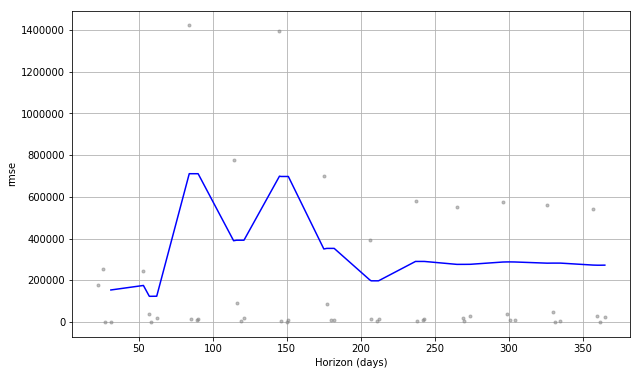

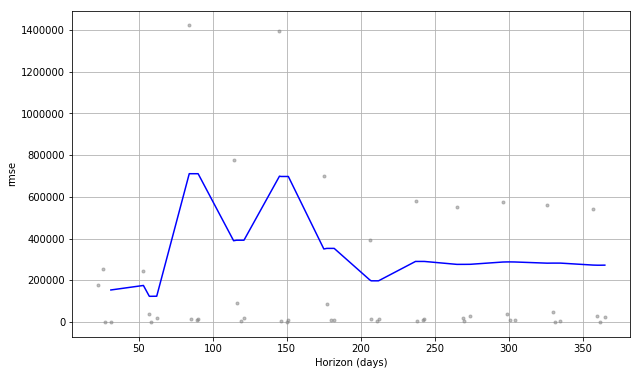

In [91]:
plot_cross_validation_metric(cv,metric='rmse')

In [92]:
### Thanks For Watching
### Jesus Saves @JCharisTech
### Jesse E.Agbe(JCharis)
### J-Secur1ty